In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class Perceptron(object):
    '''
    classificator based on perceptron
    
    Parameters
    -------
    eta: float 
        learning speed (between 0.0 and 1.0)
    n_iter: int
        number of iterations
        
    Atributes
    --------
    
    w_ : 1-x array
        weight coefficients after fit
    errors_: list
        number of wrong answers in each era
    '''
    
    def __init__(self,eta=0.01,n_iter=10):
        self.eta= eta
        self.n_iter = n_iter
    
    def fit(self, X,y):
        '''fit model to the train data
        
        Parameters
        ------
        
        X: array-like, form = (n_samples, n_features)
            train arrays, where:
                    n_samples - number of samples
                    n_features - number of features
        y: array-like, form = (n_samples)
            target values
            
        Return
        -------
        self: object
        '''
        self.w_ = np.zeros(1+X.shape[1])
        self.errors_  = []
        
        for _ in range(self.n_iter):
            errors=0
            for xi,target in zip(X,y):
                update = self.eta * (target-self.predict(xi))
                self.w_[1:] += update*xi
                self.w_[0] += update
                errors += int(update !=0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self,X):
        '''calculate clean output'''
        return np.dot(X, self.w_[1:])+self.w_[0]
    
    def predict(self,X):
        '''return class after single leap'''
        return np.where(self.net_input(X) >=0.0,1,-1)

In [6]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url, header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [16]:
y = df.iloc[0:100,4].values
y = np.where(y=='Iris-setosa',1,-1)
X = df.iloc[0:100,[0,2]].values

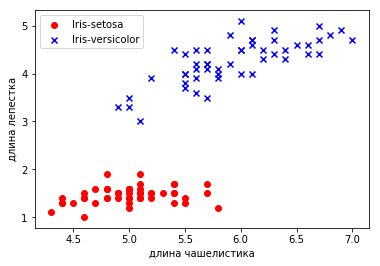

In [24]:
plt.scatter(X[:50,0],X[:50,1],
           color='red',marker='o', label='Iris-setosa')
plt.scatter(X[50:100,0],X[50:100,1],
           color='blue',marker='x', label='Iris-versicolor')
plt.xlabel('длина чашелистика')
plt.ylabel('длина лепестка')
plt.legend(loc='upper left')
plt.show()

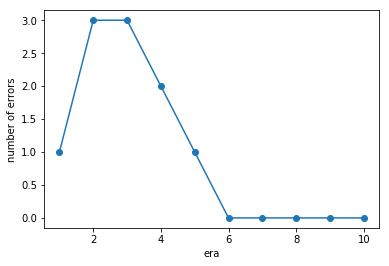

In [26]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X,y)
plt.plot(range(1,len(ppn.errors_)+1),ppn.errors_,marker='o')
plt.xlabel('era')
plt.ylabel('number of errors')
plt.show()

In [28]:
from matplotlib.colors import ListedColormap

In [34]:
def plot_decision_regions(X,y,classifier,resolution=0.02):
    #build marker generator and colormap
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #draw solution area
    x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1
    x2_min, x2_max = X[:,1].min()-1, X[:,1].max()+1
    xx1,xx2 = np.meshgrid(np.arange(x1_min, x1_max,resolution),
                          np.arange(x2_min, x2_max,resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.4,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    #show classes
    for idx, c1 in enumerate(np.unique(y)):
        plt.scatter(x=X[y==c1,0],y=X[y==c1,1],
                    alpha = 0.8, c=cmap(idx),
                   marker=markers[idx], label=c1)

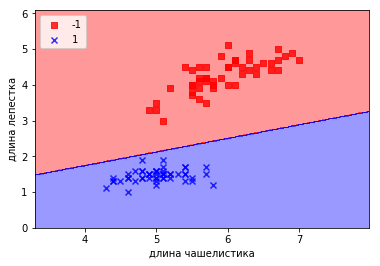

In [68]:
plot_decision_regions(X,y,classifier=ppn)
plt.xlabel('длина чашелистика')
plt.ylabel('длина лепестка')
plt.legend(loc='upper left')
plt.show()

# Adaline

In [42]:
class AdalineGD(object):
    '''
    classificator based on Adaline
    
    Parameters
    -------
    eta: float 
        learning speed (between 0.0 and 1.0)
    n_iter: int
        number of iterations
        
    Atributes
    --------
    
    w_ : 1-x array
        weight coefficients after fit
    errors_: list
        number of wrong answers in each era
    '''
    
    def __init__(self,eta=0.01,n_iter=10):
        self.eta= eta
        self.n_iter = n_iter
    
    def fit(self, X,y):
        '''fit model to the train data
        
        Parameters
        ------
        
        X: array-like, form = (n_samples, n_features)
            train arrays, where:
                    n_samples - number of samples
                    n_features - number of features
        y: array-like, form = (n_samples)
            target values
            
        Return
        -------
        self: object
        '''
        self.w_ = np.zeros(1+X.shape[1])
        self.cost_  = []
        
        for _ in range(self.n_iter):
            output=self.net_input(X)
            errors = (y-output)
            self.w_[1:] += self.eta*X.T.dot(errors)
            self.w_[0] += self.eta*errors.sum()
            cost = (errors**2).sum()/2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self,X):
        '''calculate clean output'''
        return np.dot(X, self.w_[1:])+self.w_[0]
    
    def activation(self,X):
        '''calculate linear activation'''
        return self.net_input(X)
    
    def predict(self,X):
        '''return class after single leap'''
        return np.where(self.net_input(X) >=0.0,1,-1)

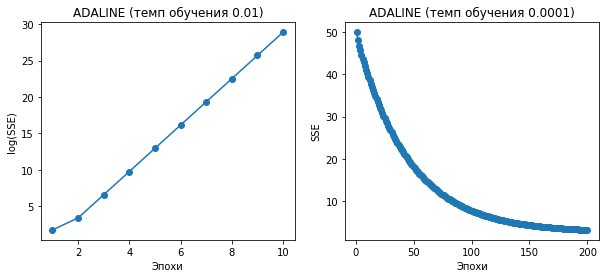

In [61]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ada1 = AdalineGD(n_iter=10,eta=0.01).fit(X,y)
ax[0].plot(range(1,len(ada1.cost_)+1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Эпохи')
ax[0].set_ylabel('log(SSE)')
ax[0].set_title('ADALINE (темп обучения 0.01)')

ada2 = AdalineGD(n_iter=200,eta=0.0001).fit(X,y)
ax[1].plot(range(1,len(ada2.cost_)+1), ada2.cost_, marker='o')
ax[1].set_xlabel('Эпохи')
ax[1].set_ylabel('SSE')
ax[1].set_title('ADALINE (темп обучения 0.0001)')

plt.show()

In [62]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0]-X[:,0].mean())/X[:,0].std()
X_std[:,1] = (X[:,1]-X[:,1].mean())/X[:,1].std()

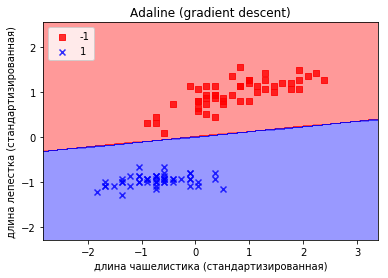

In [65]:
ada = AdalineGD(n_iter=15,eta=0.01)
ada.fit(X_std,y)
plot_decision_regions(X_std,y,classifier=ada)
plt.title('Adaline (gradient descent)')
plt.xlabel('длина чашелистика (стандартизированная)')
plt.ylabel('длина лепестка (стандартизированная)')
plt.legend(loc='upper left')
plt.show()

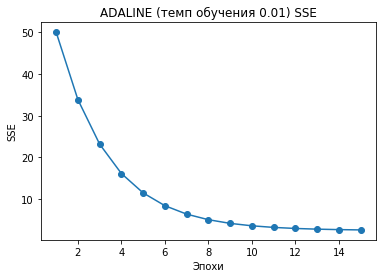

In [67]:
plt.plot(range(1,len(ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('Эпохи')
plt.ylabel('SSE')
plt.title('ADALINE (темп обучения 0.01) SSE')
plt.show()